<a href="https://colab.research.google.com/github/sarodeshreyash/OIBSIP/blob/main/Task2_Unemployement_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task-2 Unemployment Analysis

## **By-** **Shreyash Sharad Sarode**

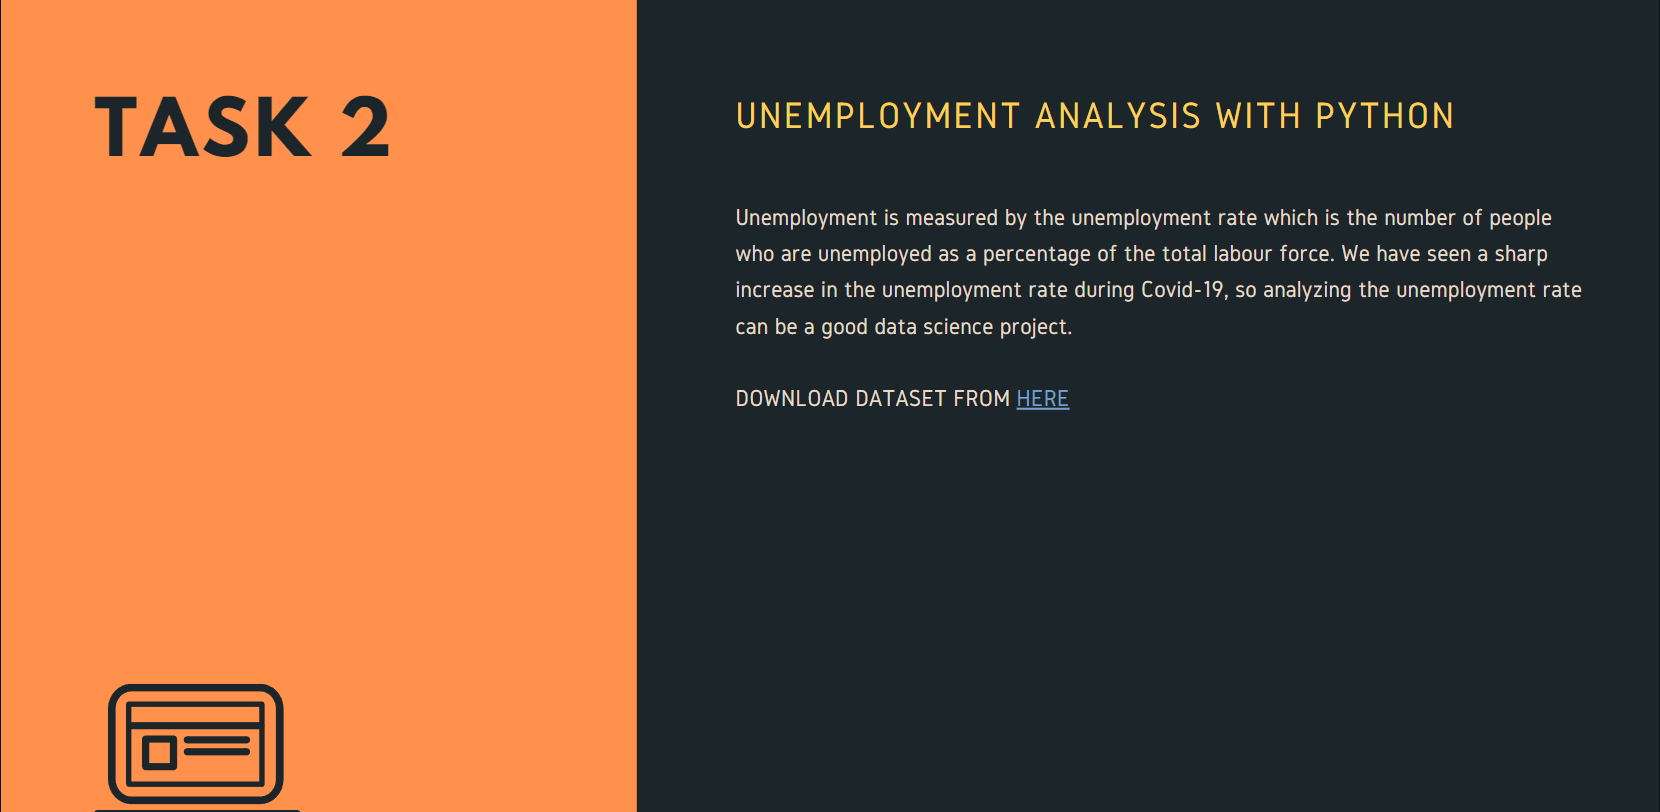

In [1]:
#Importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/Oasis Infobyte/unemployement dataset/Unemployment in India.csv'
df=pd.read_csv(path)

### Data Exploration

In [4]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [7]:
#Checking for null values
df.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(740, 7)

## Data Wrangling

In [10]:
#Converting the date into datetime format
df['Date']=pd.to_datetime(df[' Date'])

In [11]:
#Extracting the year and month from the date
year=[i.strftime('%Y') for i in list(df['Date'])]
month=[i.strftime('%B') for i in list(df['Date'])]

In [12]:
df['Year']=year
df['Month']=month

In [13]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Date,Year,Month
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,2019-05-31,2019,May
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,2019-06-30,2019,June
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,2019-07-31,2019,July
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,2019-08-31,2019,August
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,2019-09-30,2019,September


## EDA

In [14]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area', 'Date', 'Year', 'Month'],
      dtype='object')

### Area wise unemployment analysis

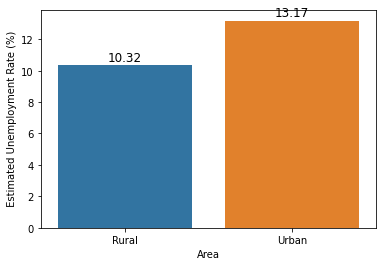

In [15]:
area_unemp=df.groupby(['Area'],as_index=False)[' Estimated Unemployment Rate (%)'].mean()
area_unemp_plot=sns.barplot(data=area_unemp,x='Area',y=' Estimated Unemployment Rate (%)')
for bar in area_unemp_plot.patches:
    area_unemp_plot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

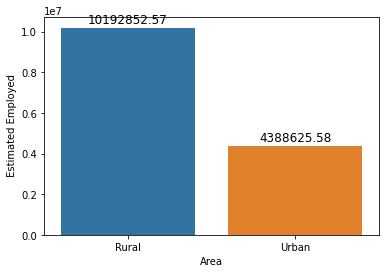

In [16]:
area_emp=df.groupby(['Area'],as_index=False)[' Estimated Employed'].mean()
area_emp_plot=sns.barplot(data=area_emp,x='Area',y=' Estimated Employed')
for bar in area_emp_plot.patches:
    area_emp_plot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

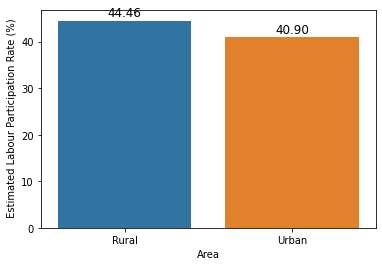

In [17]:
area_lab=df.groupby(['Area'],as_index=False)[' Estimated Labour Participation Rate (%)'].mean()
area_lab_plot=sns.barplot(data=area_lab,x='Area',y=' Estimated Labour Participation Rate (%)')
for bar in area_lab_plot.patches:
    area_lab_plot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

### Regionwise Unemployment Analysis

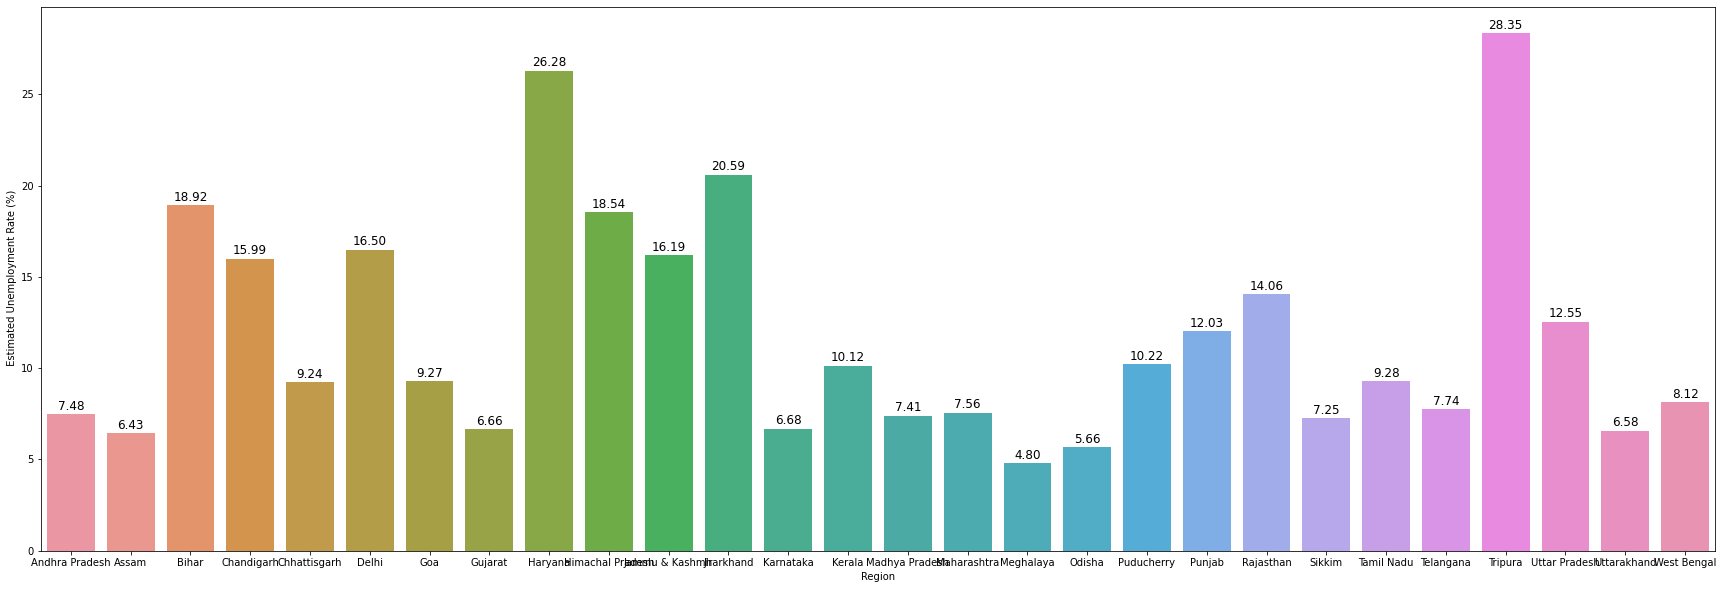

In [18]:
plt.figure(figsize=(30,10))
region_unemp=df.groupby(['Region'],as_index=False)[' Estimated Unemployment Rate (%)'].mean()
region_unemp_plot=sns.barplot(data=region_unemp,x='Region',y=' Estimated Unemployment Rate (%)')
for bar in region_unemp_plot.patches:
    region_unemp_plot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

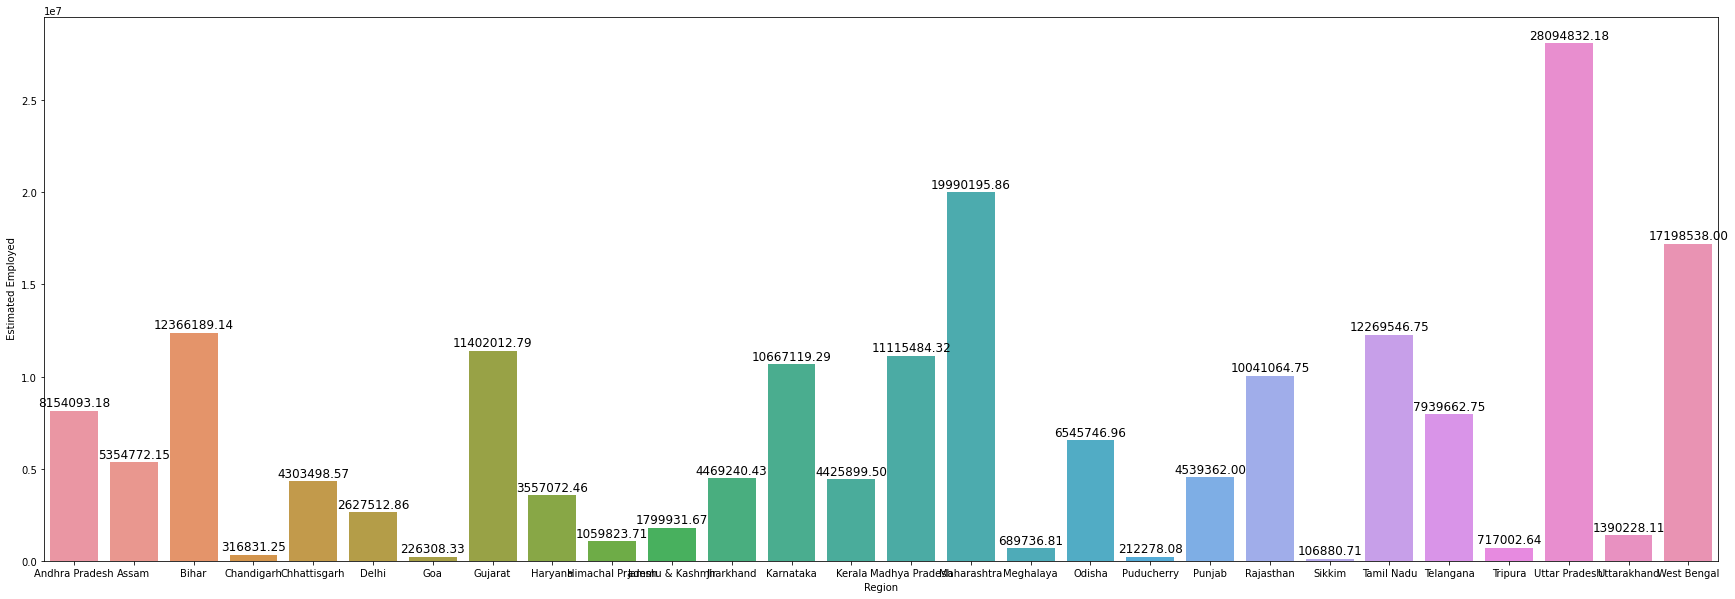

In [19]:
plt.figure(figsize=(30,10))
region_emp=df.groupby(['Region'],as_index=False)[' Estimated Employed'].mean()
region_emp_plot=sns.barplot(data=region_emp,x='Region',y=' Estimated Employed')
for bar in region_emp_plot.patches:
    region_emp_plot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

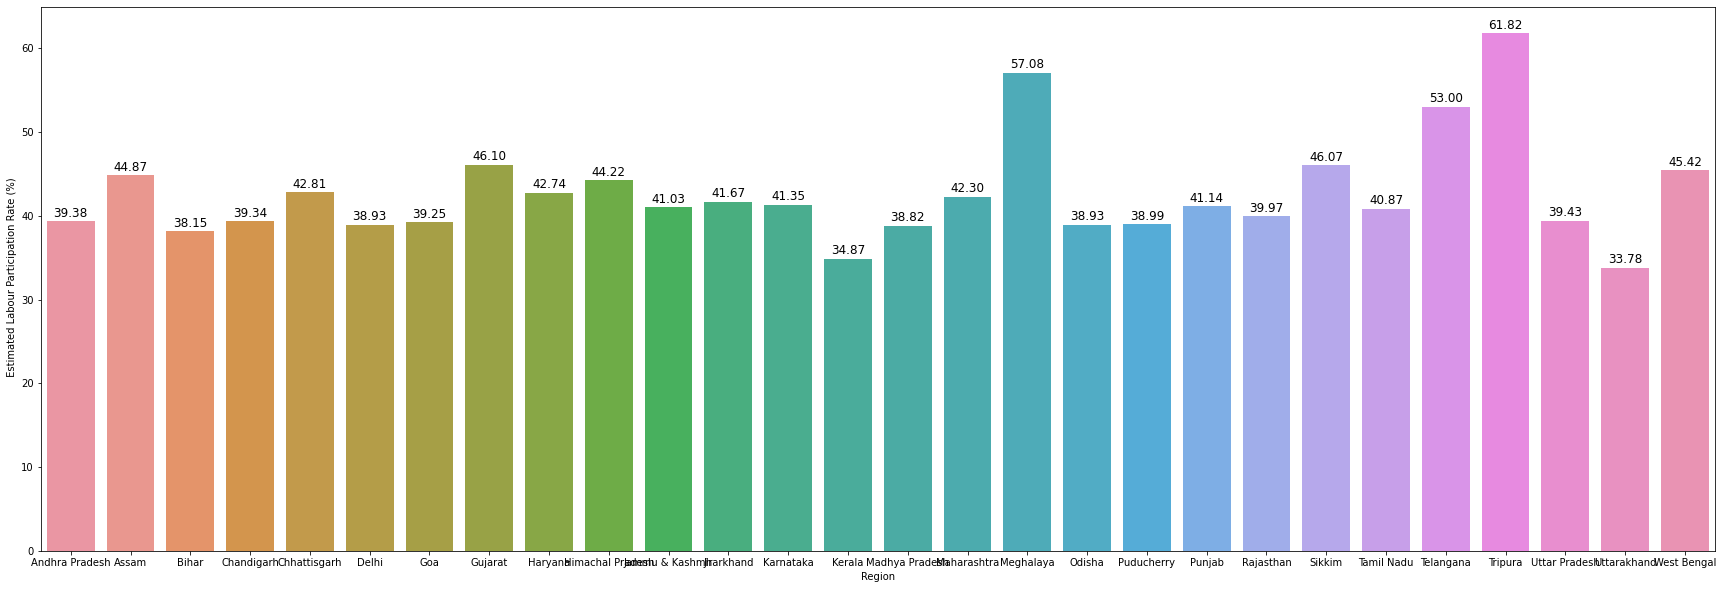

In [20]:
plt.figure(figsize=(30,10))
region_lab=df.groupby(['Region'],as_index=False)[' Estimated Labour Participation Rate (%)'].mean()
region_lab_plot=sns.barplot(data=region_lab,x='Region',y=' Estimated Labour Participation Rate (%)')
for bar in region_lab_plot.patches:
    region_lab_plot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

### Monthwise Unemployment Analysis for different regions

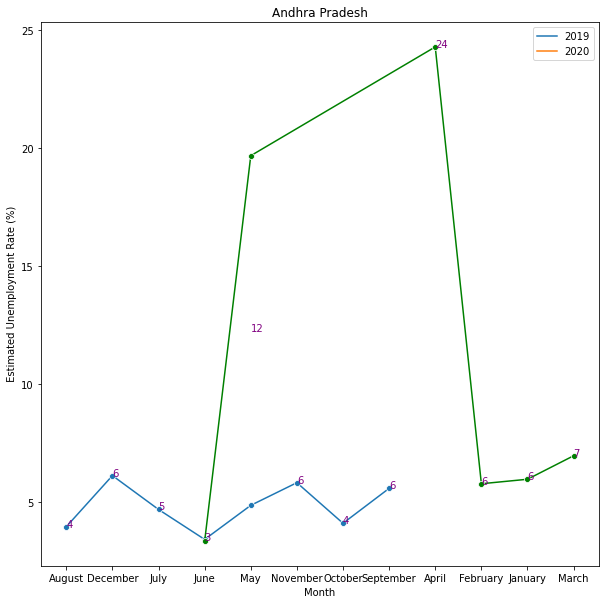

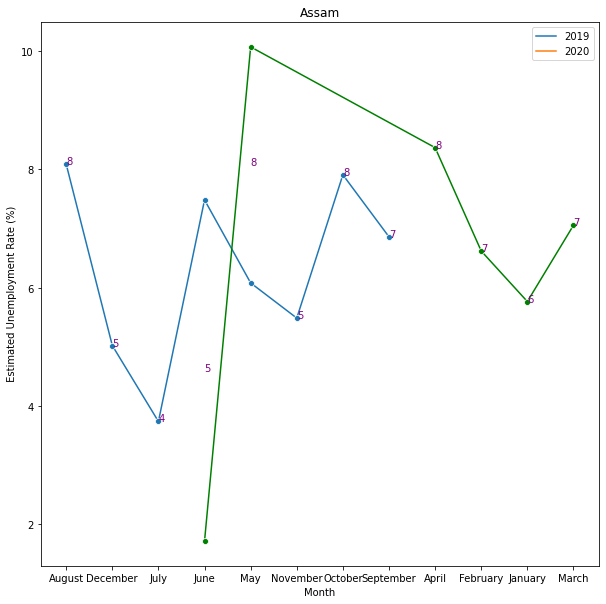

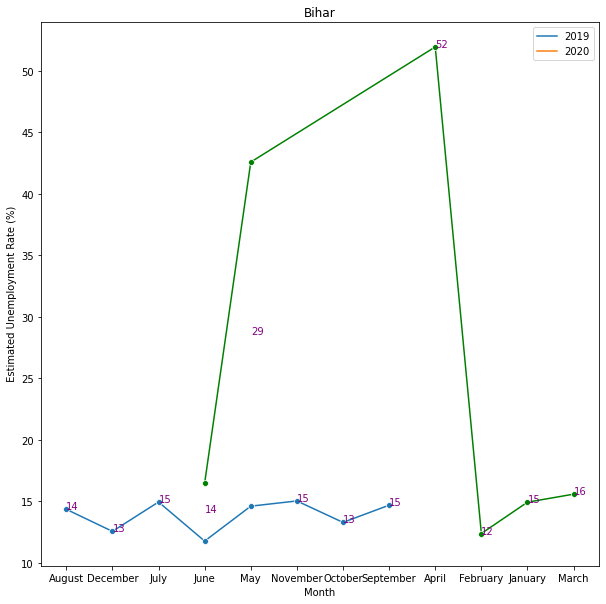

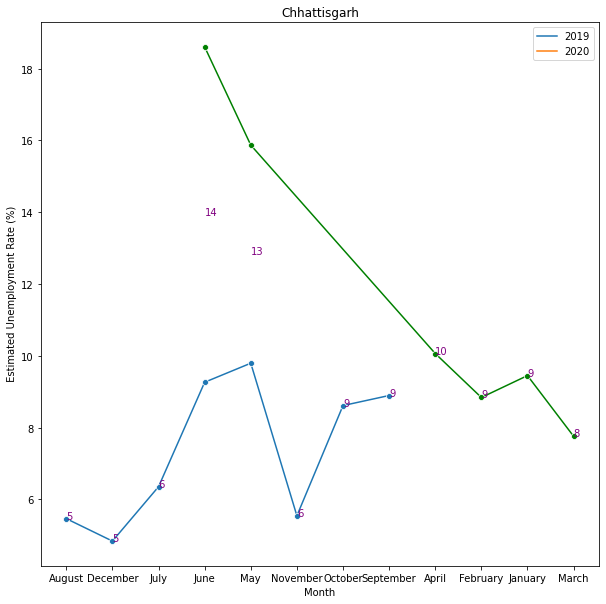

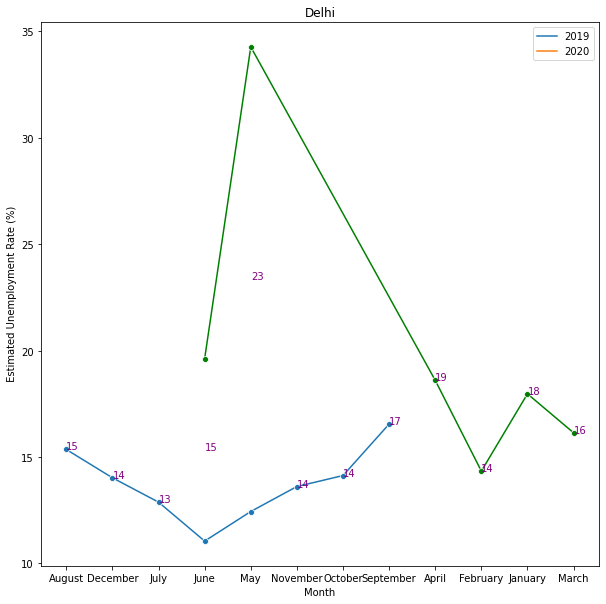

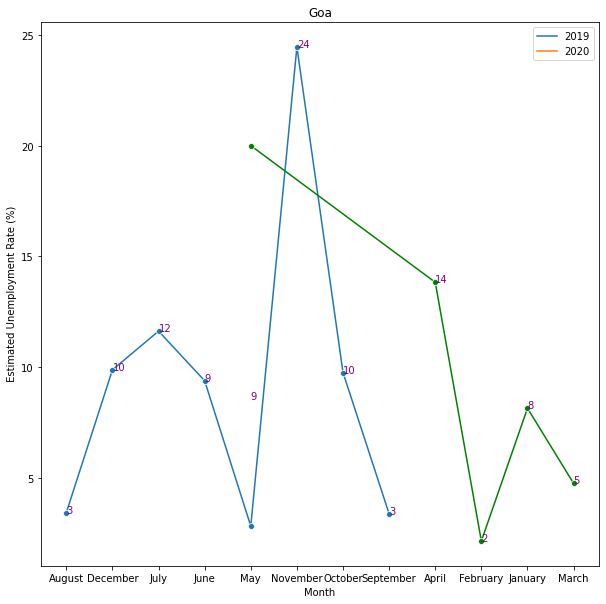

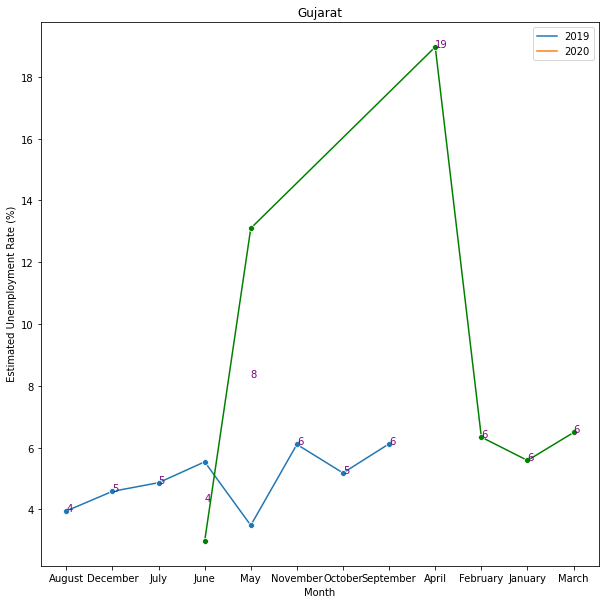

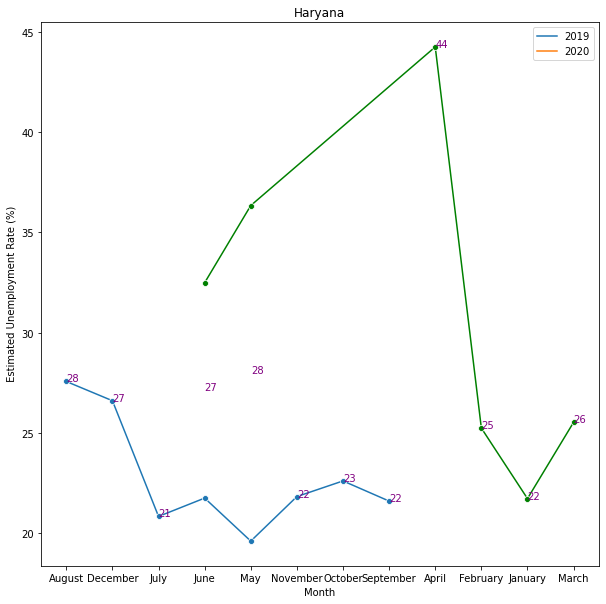

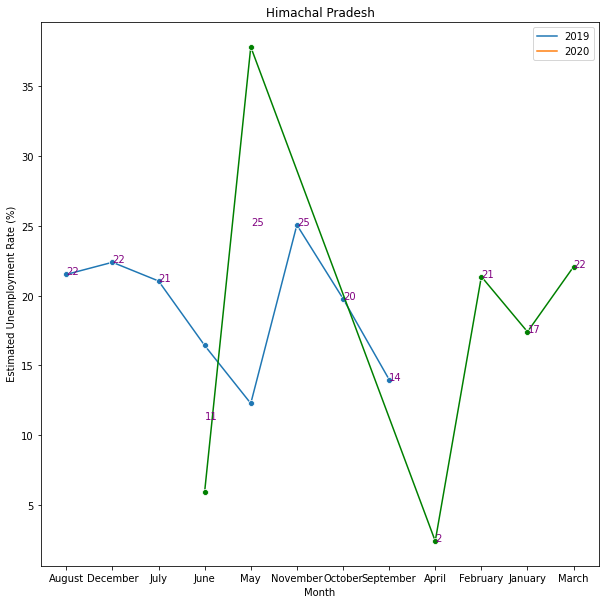

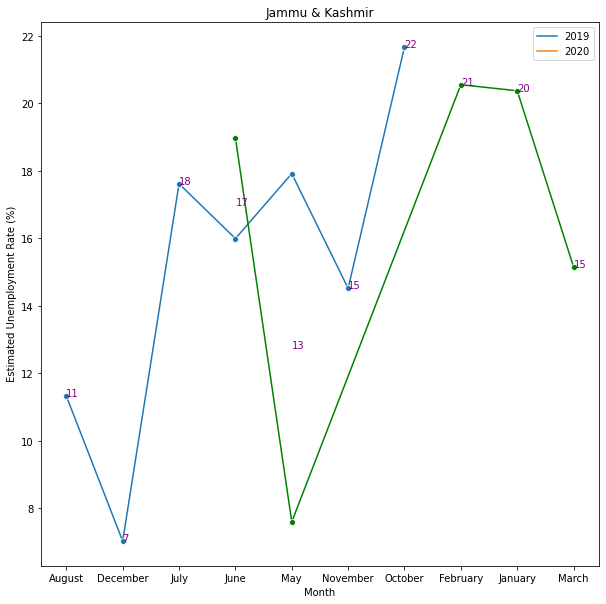

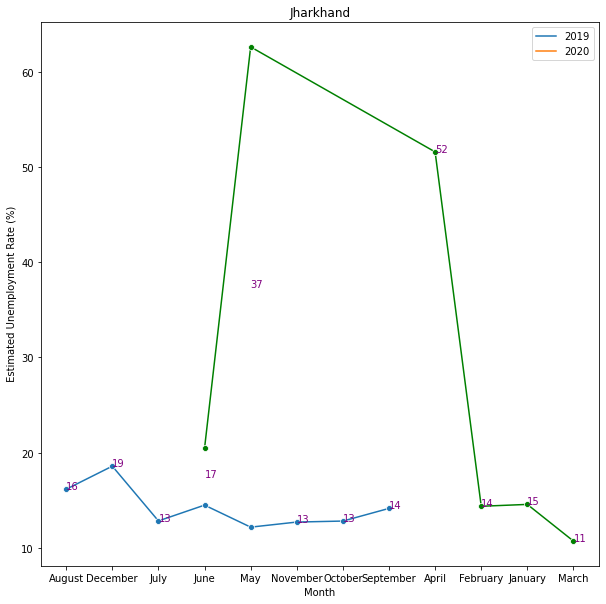

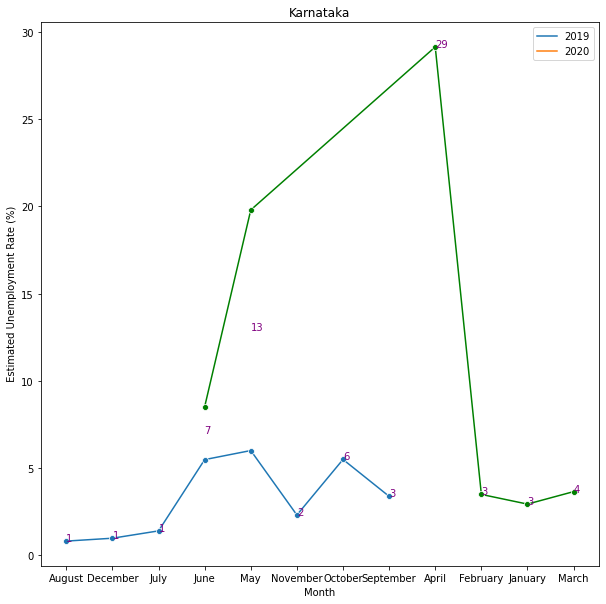

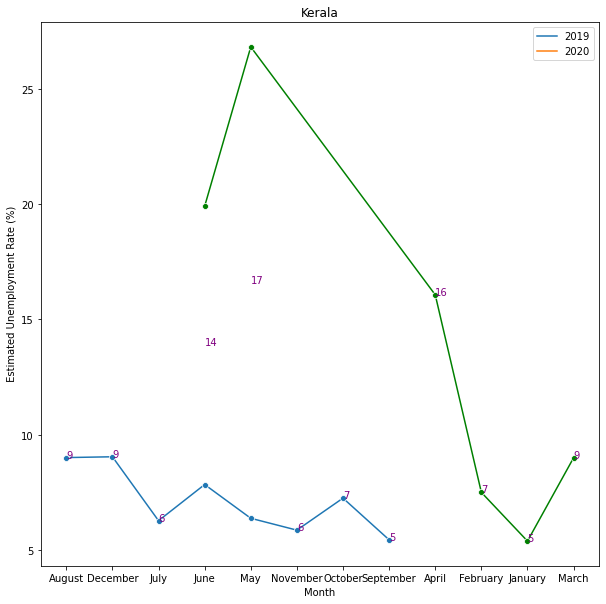

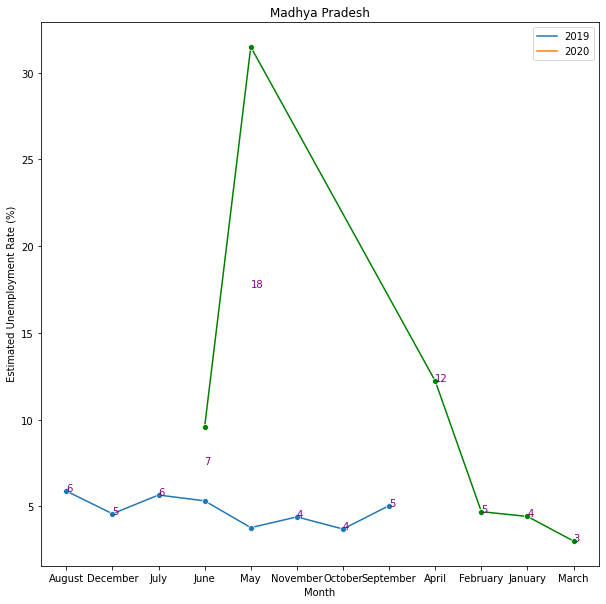

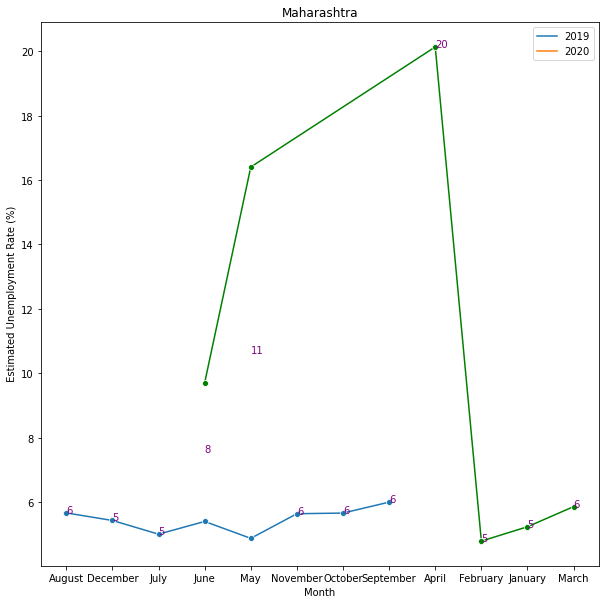

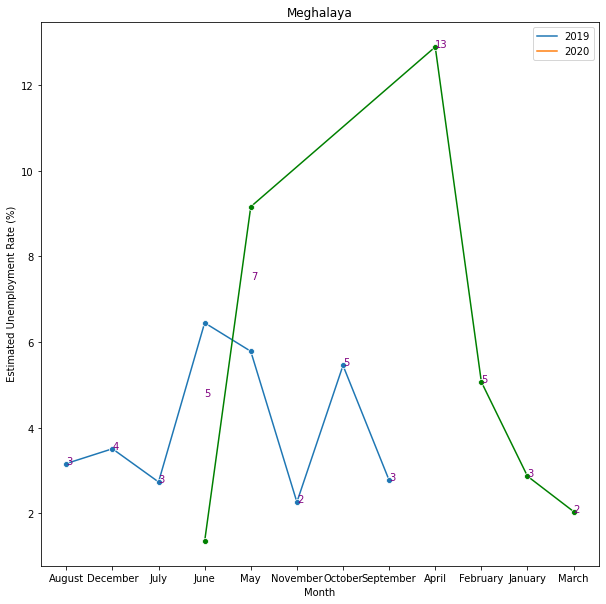

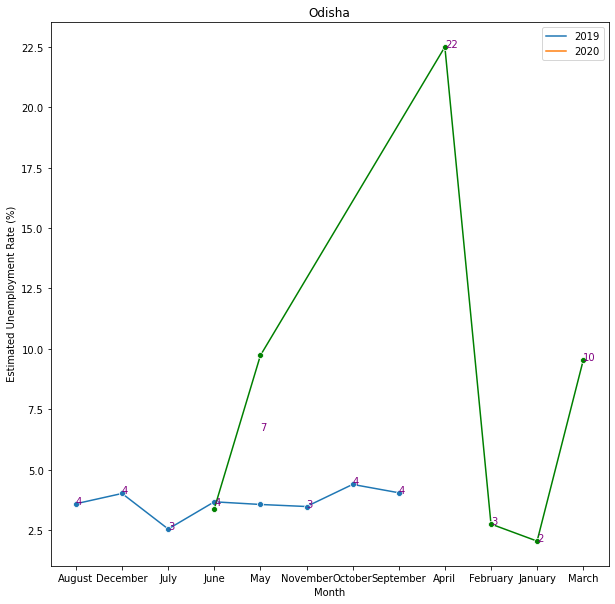

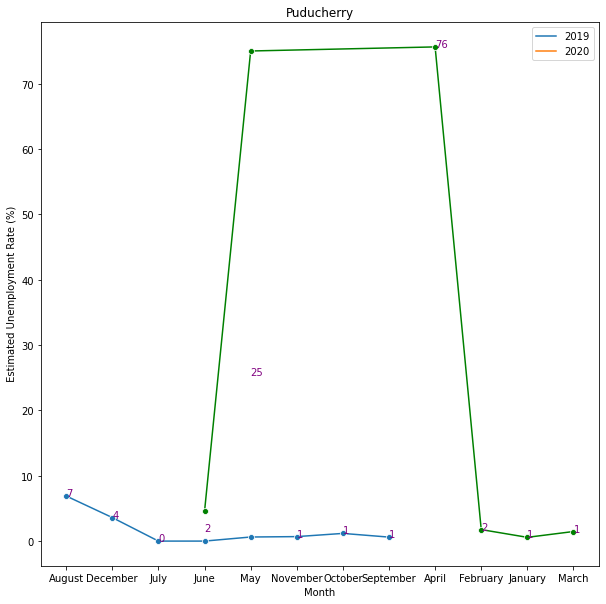

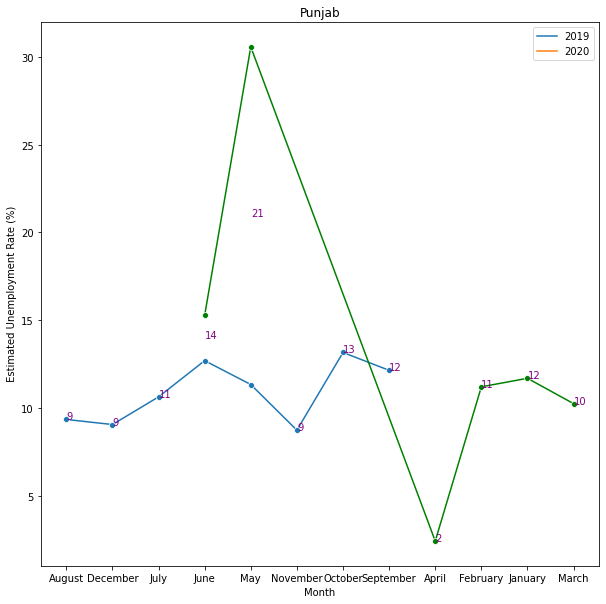

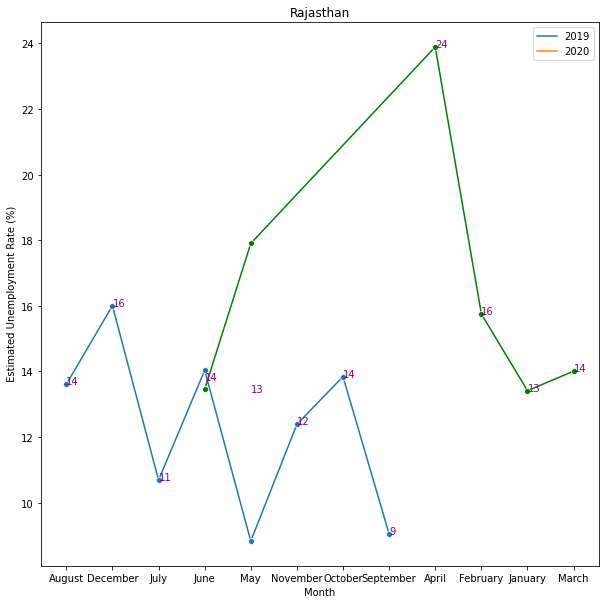

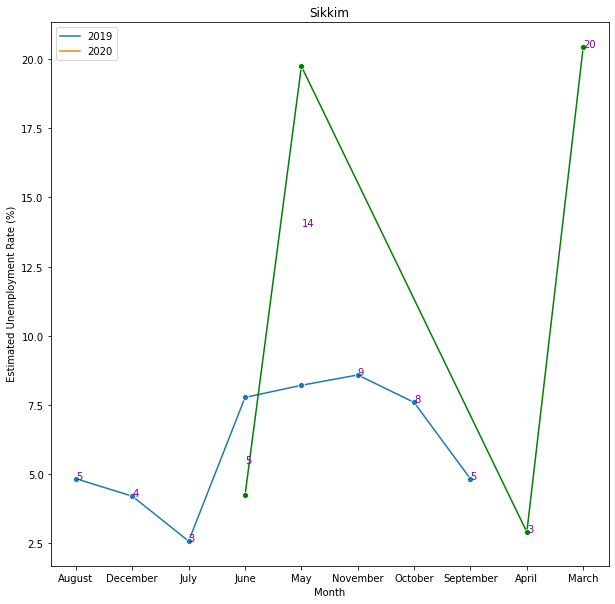

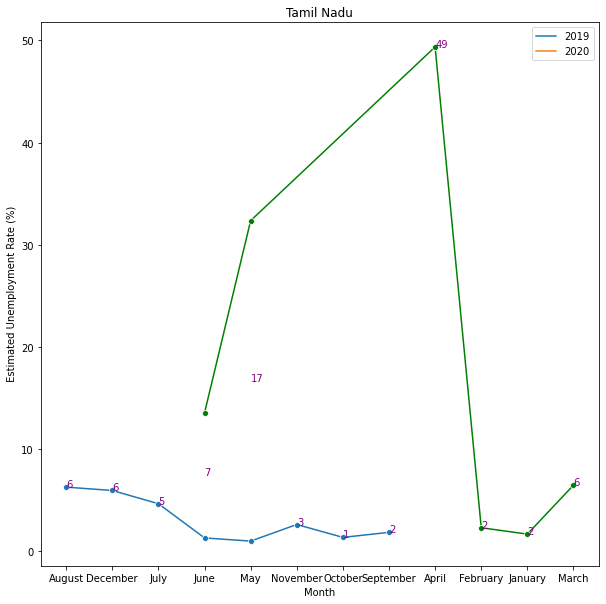

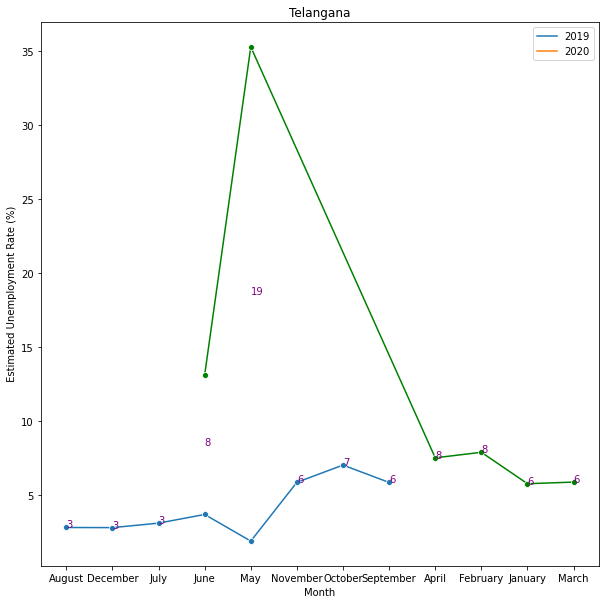

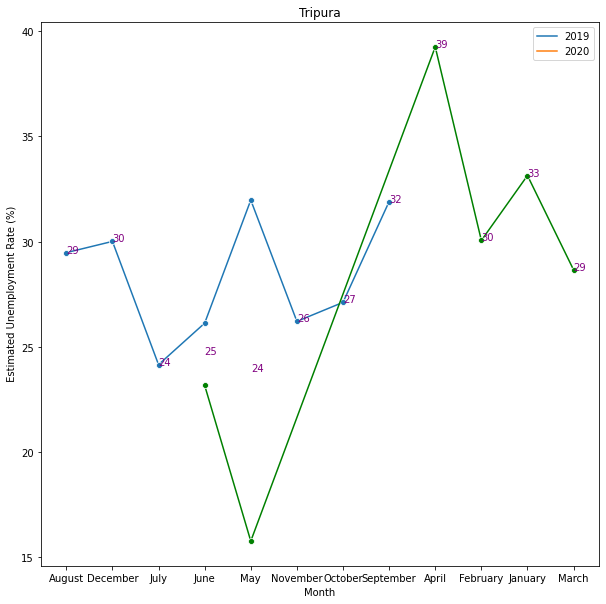

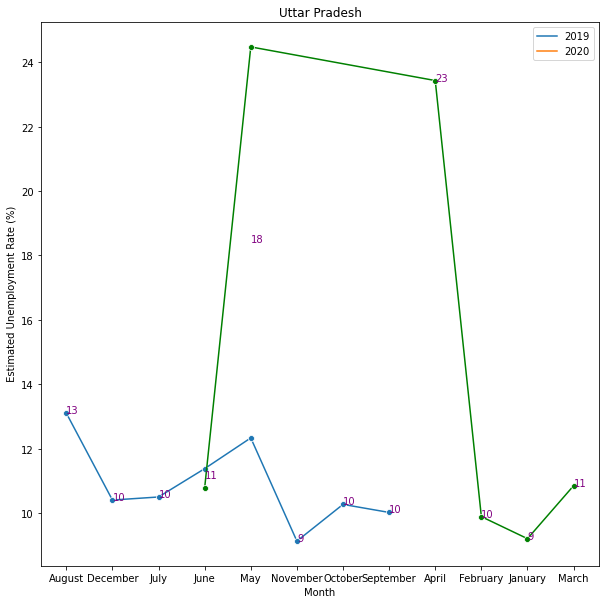

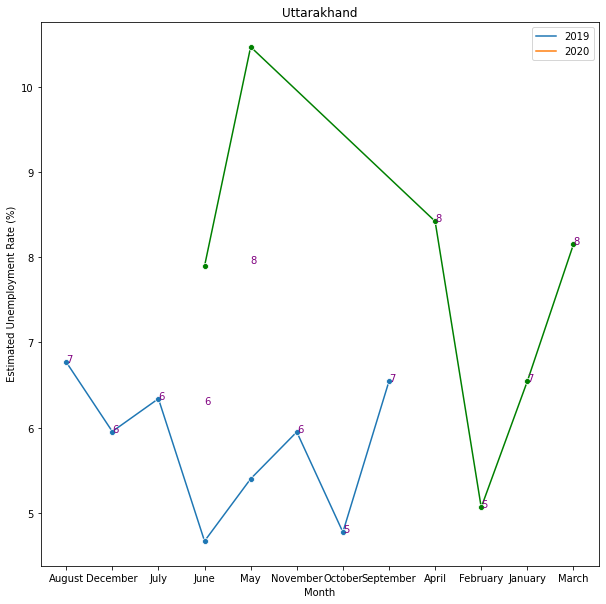

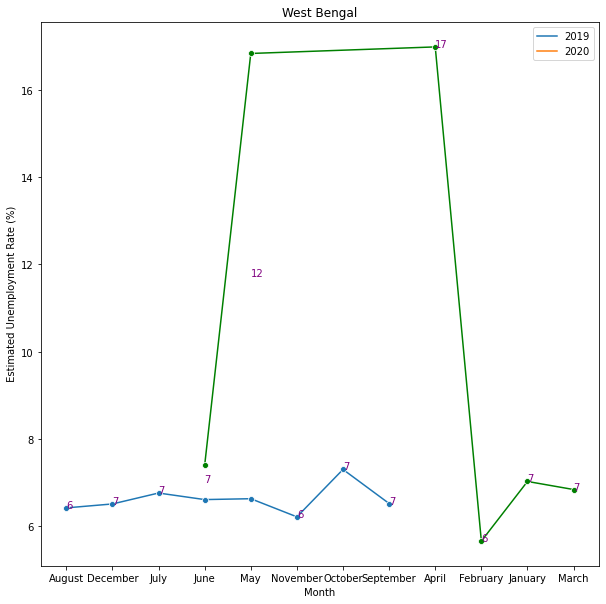

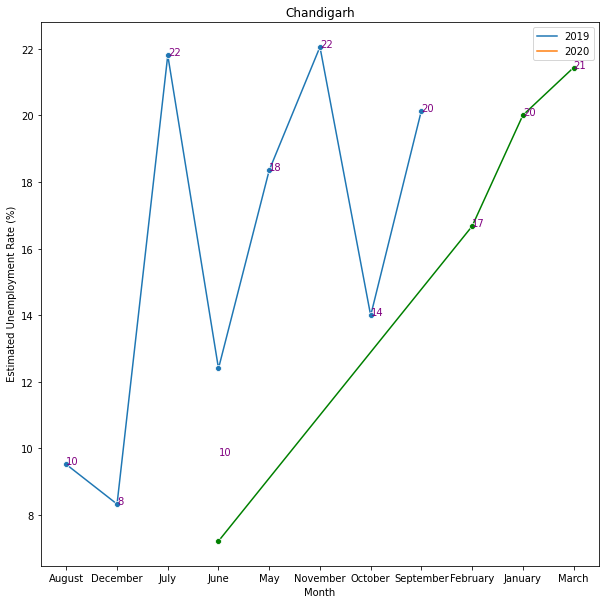

In [21]:
region_list=list(df['Region'].unique())
for i in region_list:
  plt.figure(figsize=(10,10))
  sns.lineplot(data=df[(df['Region']==i)&(df['Year']=='2019')].groupby(['Month'],as_index=False)[' Estimated Unemployment Rate (%)'].mean(),x='Month',y=' Estimated Unemployment Rate (%)',hue=df['Year'],marker='o',sort=True,color='red')
  sns.lineplot(data=df[(df['Region']==i)&(df['Year']=='2020')].groupby(['Month'],as_index=False)[' Estimated Unemployment Rate (%)'].mean(),x='Month',y=' Estimated Unemployment Rate (%)',marker='o',sort=True,color='green')
  plt.title(i)
  # label points on the plot
  for x, y in zip(df[df['Region']==i].groupby(['Month'],as_index=False)[' Estimated Unemployment Rate (%)'].mean()['Month'], df[df['Region']==i].groupby(['Month'],as_index=False)[' Estimated Unemployment Rate (%)'].mean()[' Estimated Unemployment Rate (%)']):
 # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
    plt.text(x = x, # x-coordinate position of data label
    y = y, # y-coordinate position of data label
    s = '{:.0f}'.format(y), # data label, formatted to ignore decimals
    color = 'purple') # set colour of line

  plt.show()

In [22]:
df[df['Year']=='2020']['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

### Yearwise unemplyment analysis for different regions

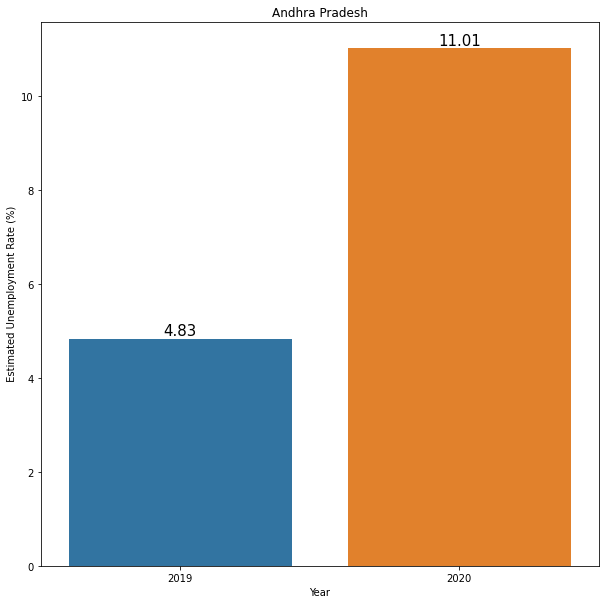

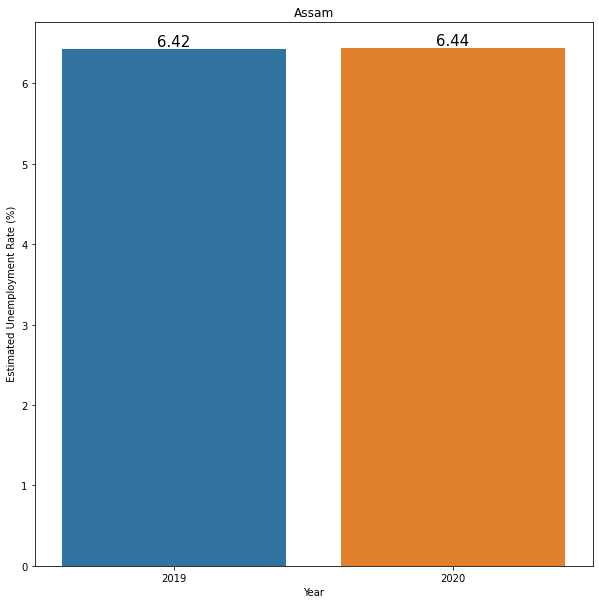

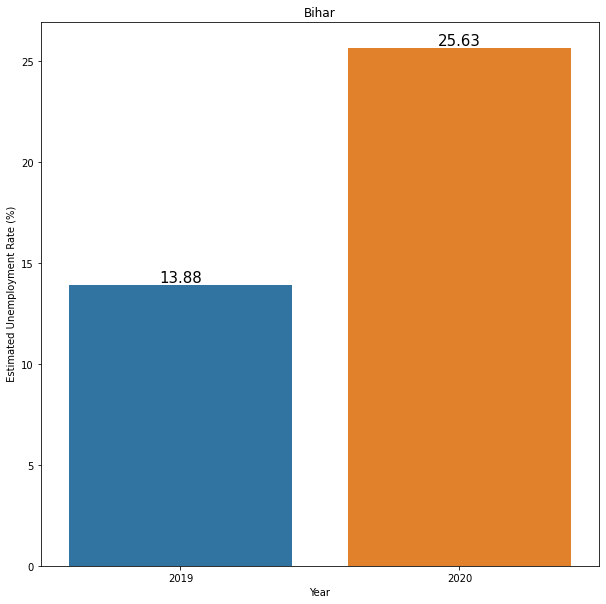

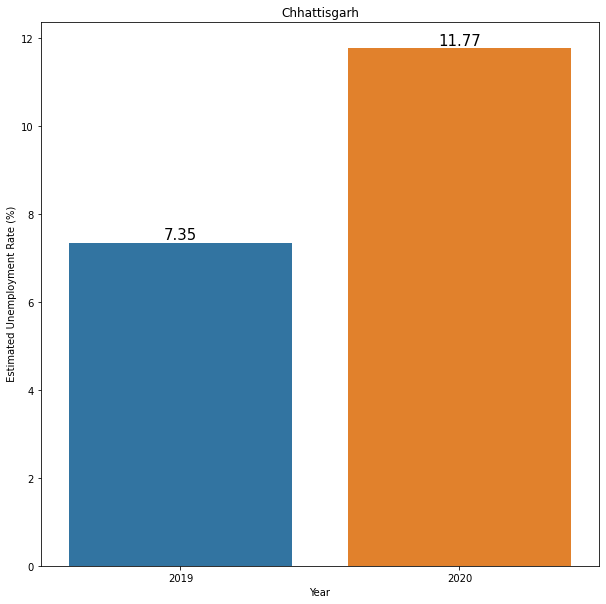

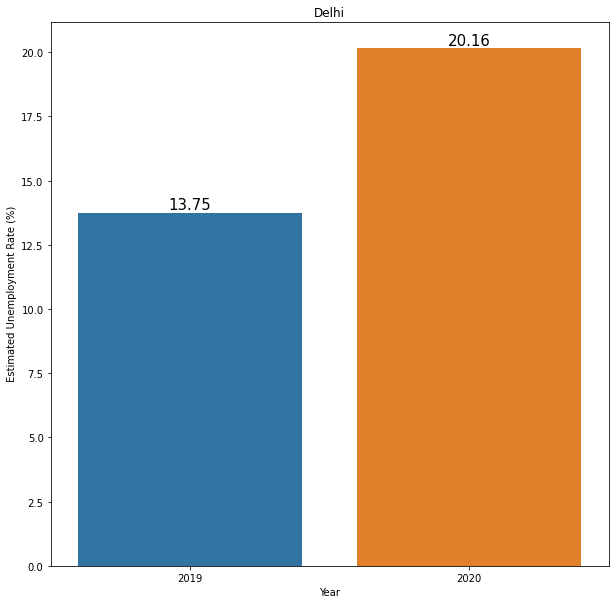

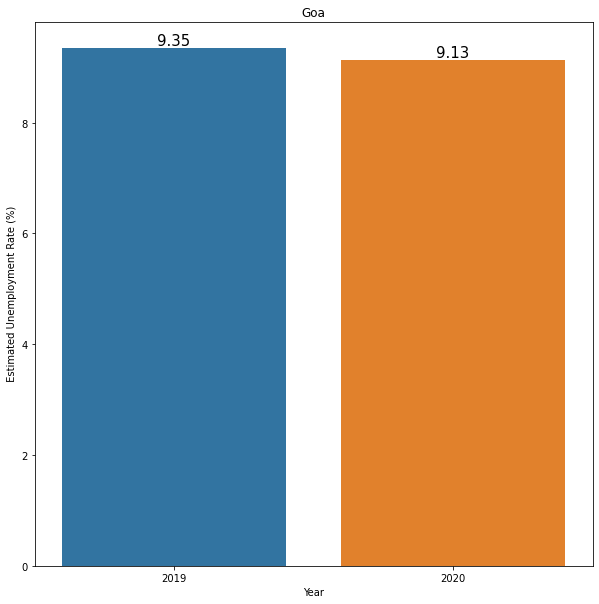

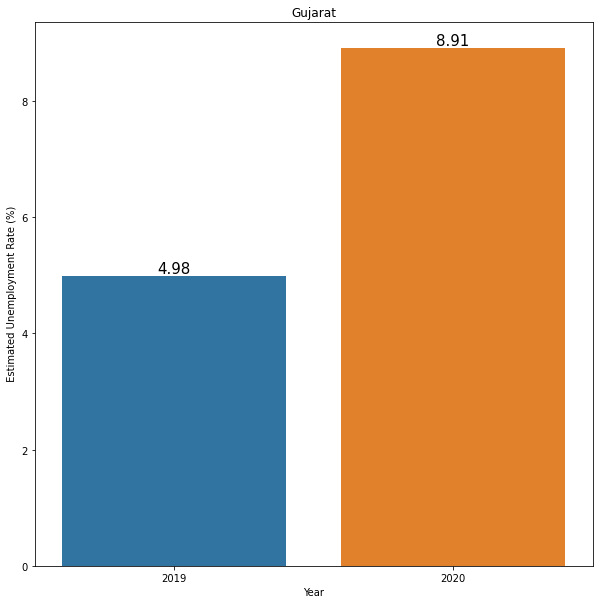

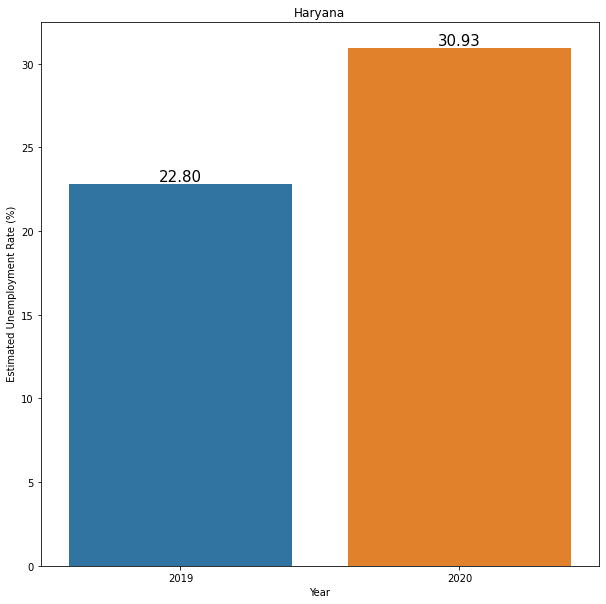

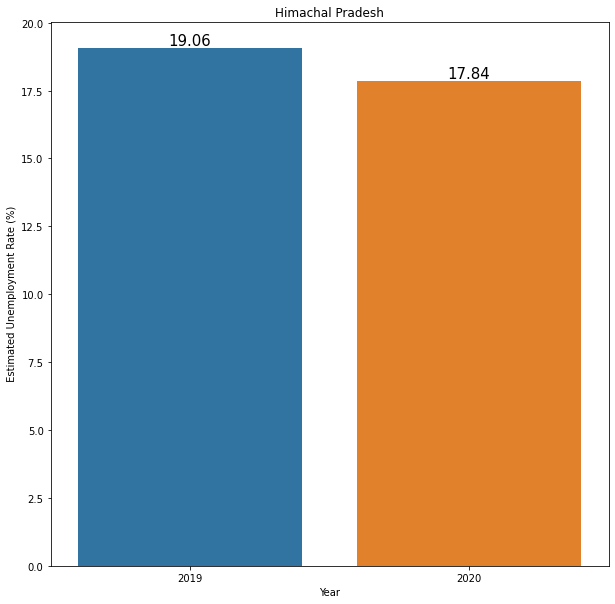

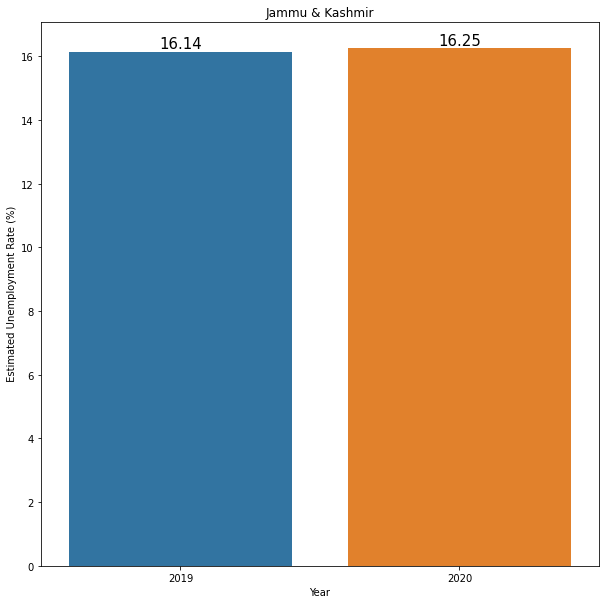

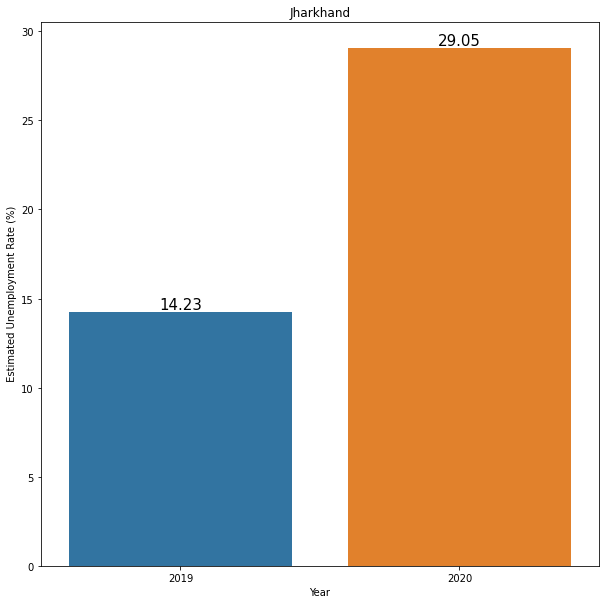

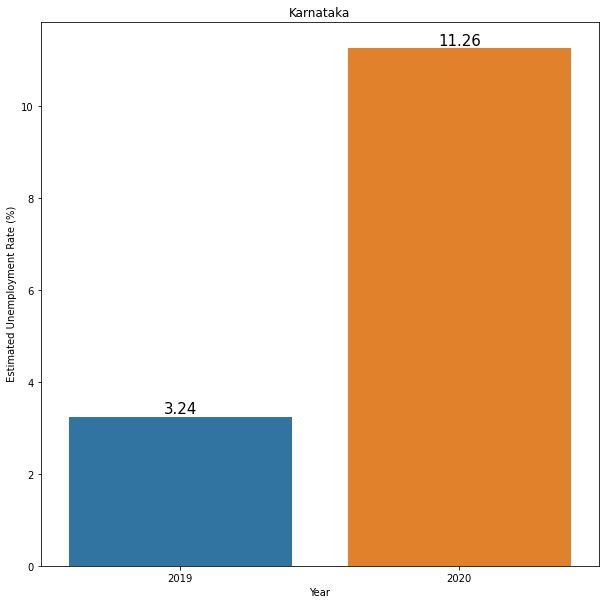

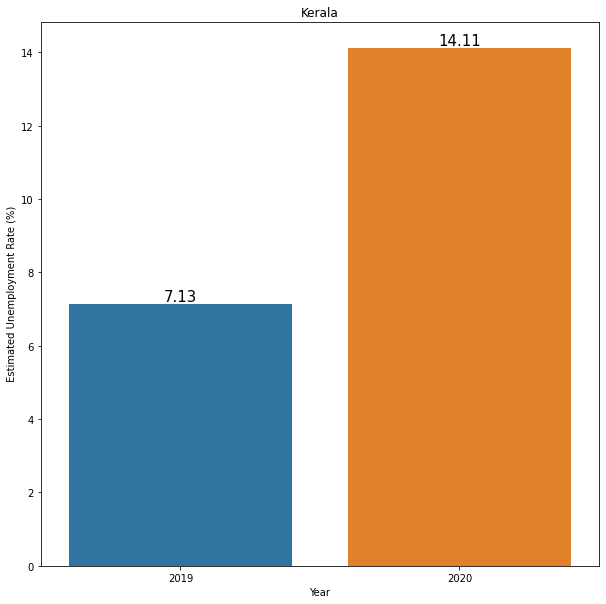

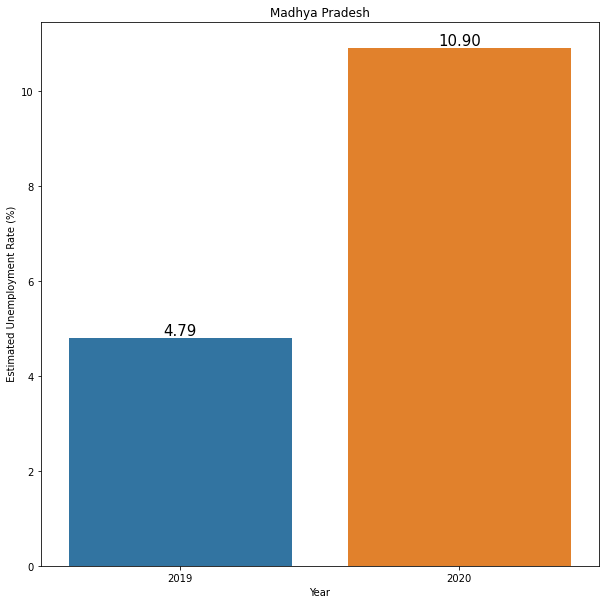

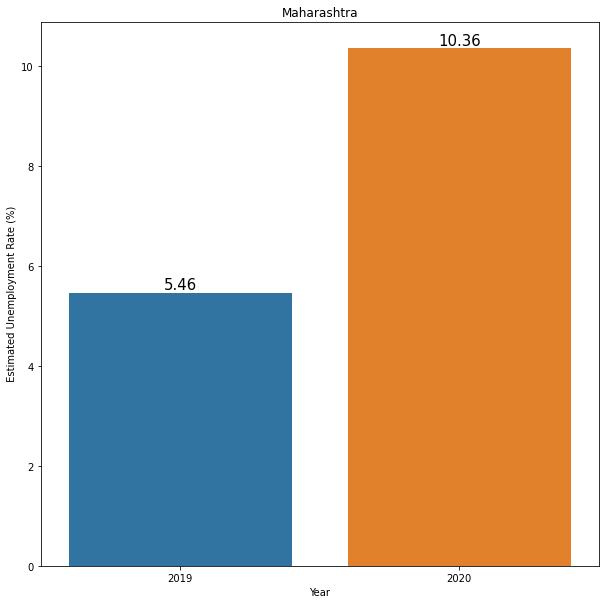

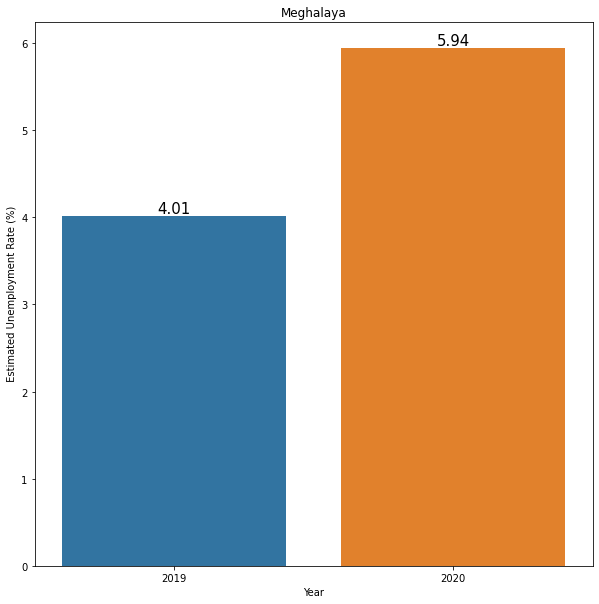

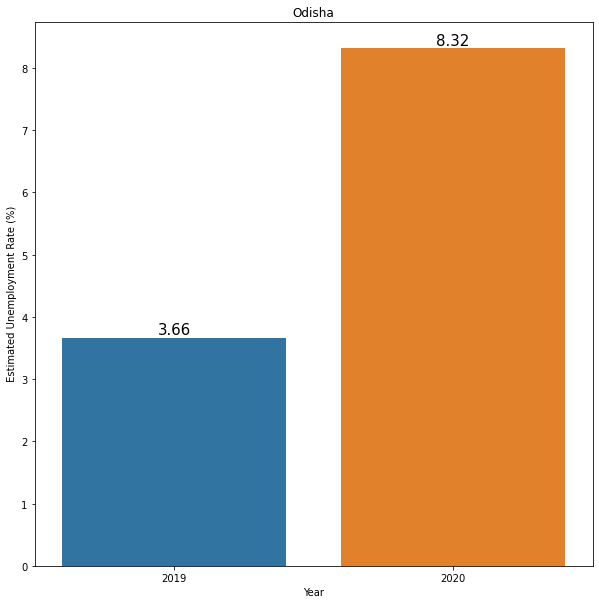

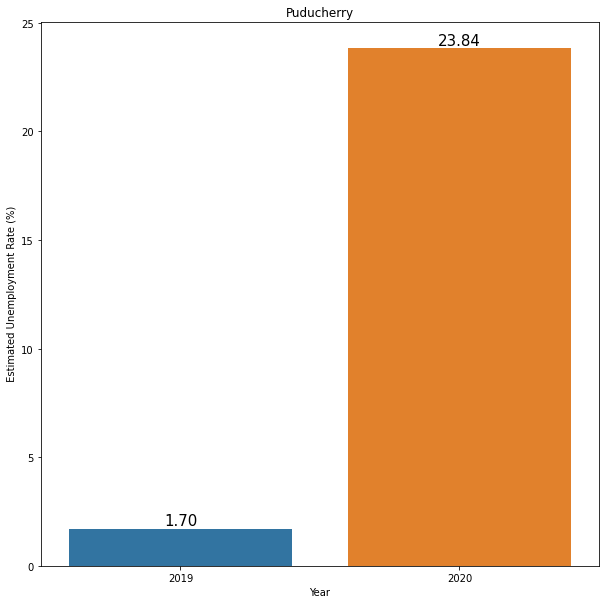

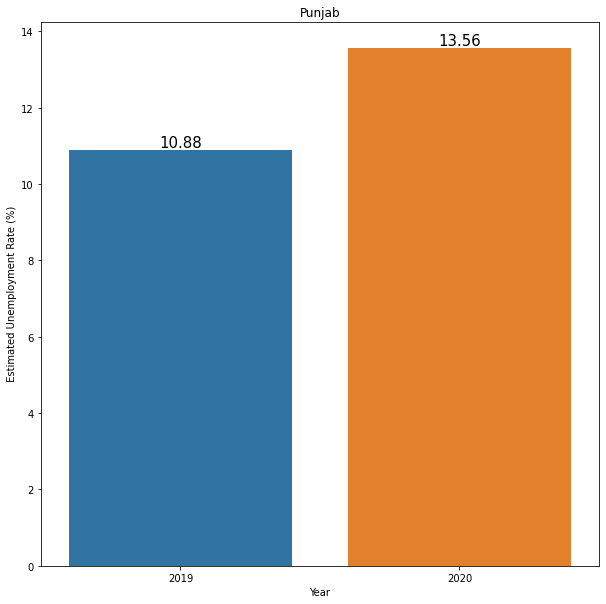

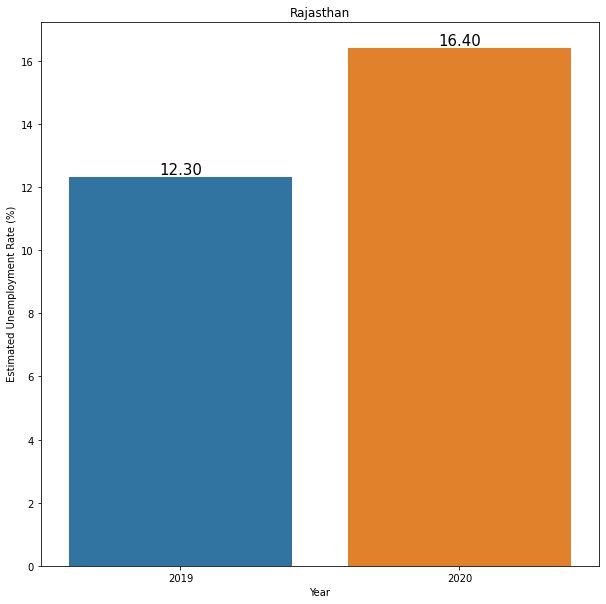

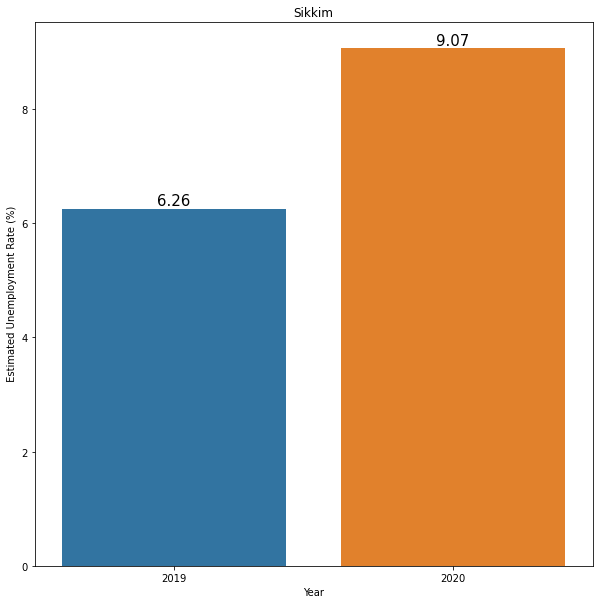

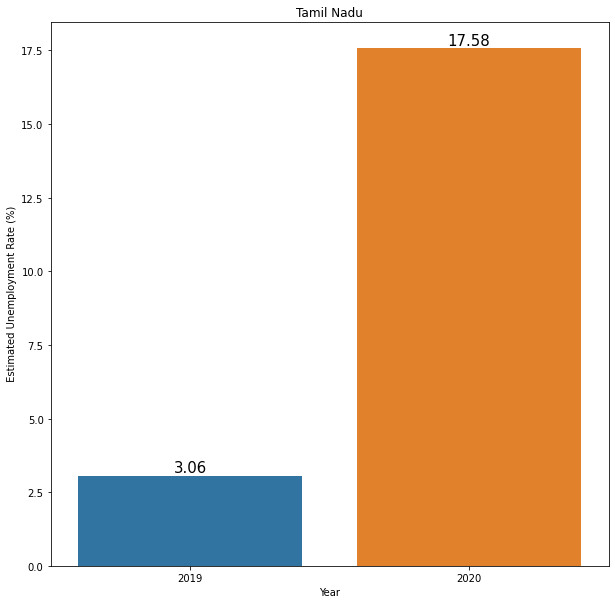

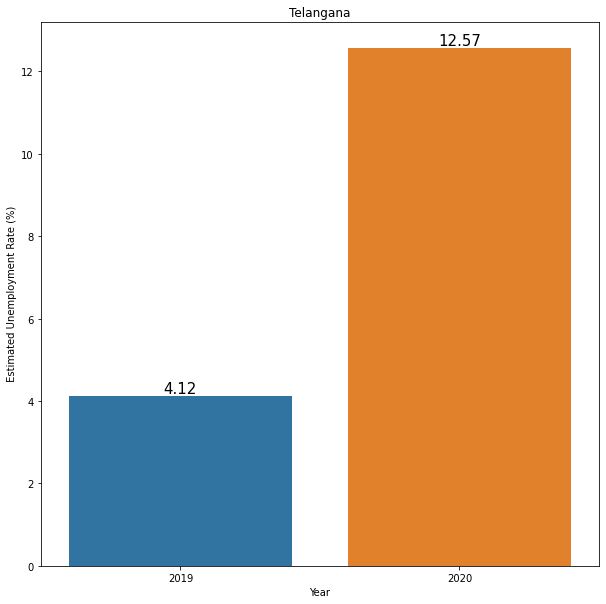

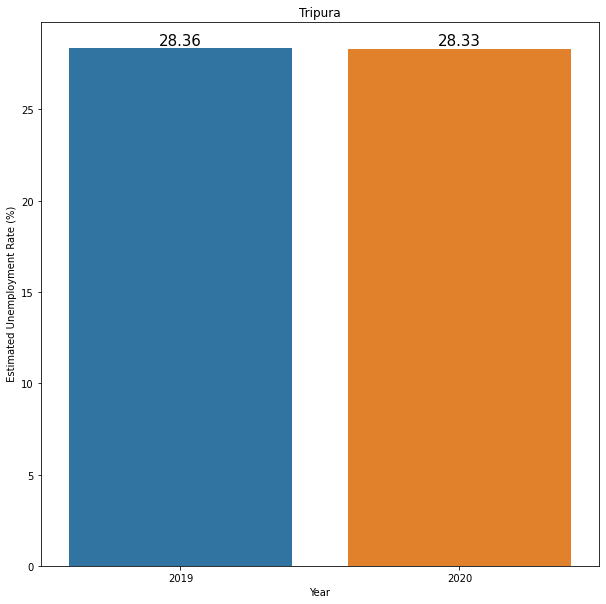

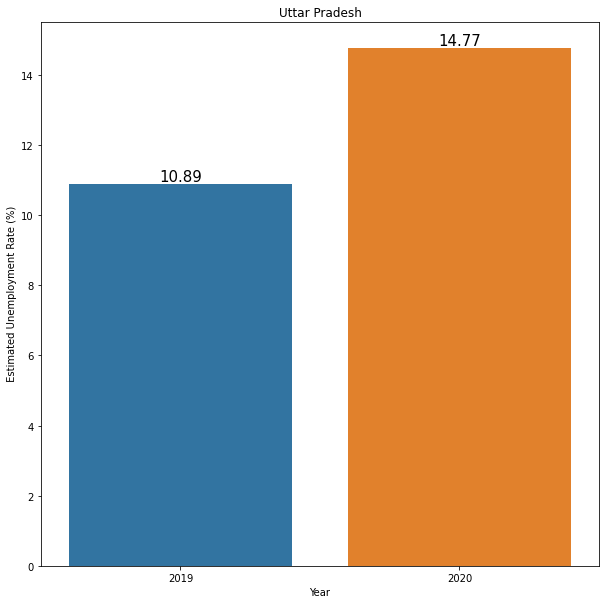

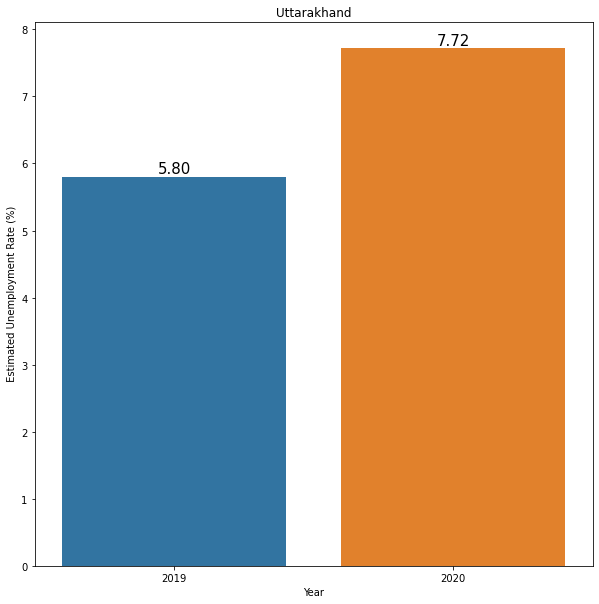

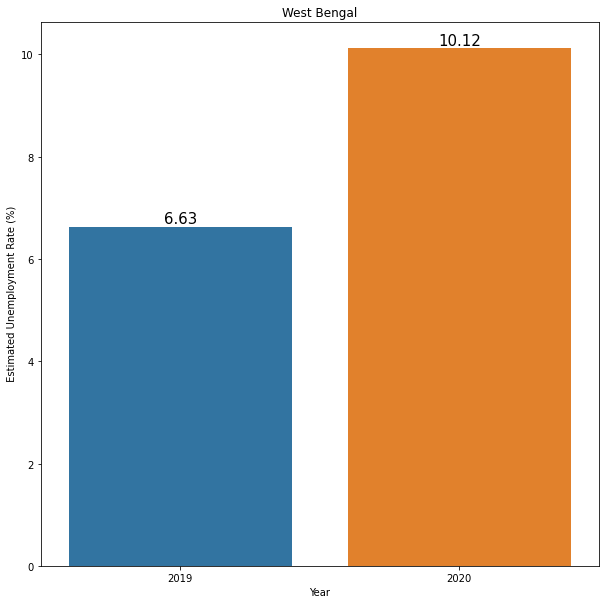

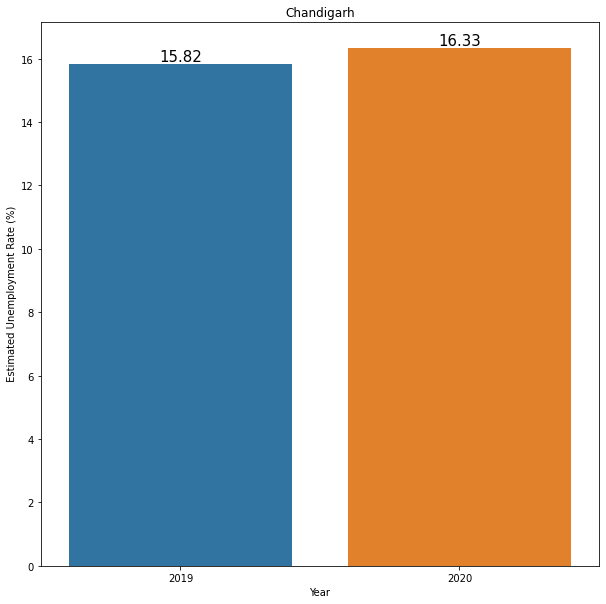

In [23]:
region_list=list(df['Region'].unique())
for i in region_list:
  plt.figure(figsize=(10,10))
  plots=sns.barplot(data=df[df['Region']==i].groupby(['Year'],as_index=False)[' Estimated Unemployment Rate (%)'].mean(),x='Year',y=' Estimated Unemployment Rate (%)')
  plt.title(i)
  for bar in plots.patches:
 
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 

### Overall Yearwise Unemployment Analysis

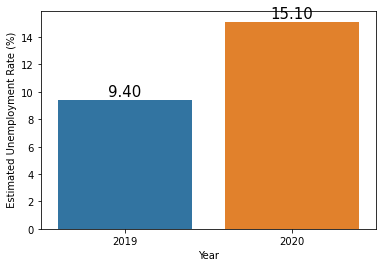

In [24]:
plot=sns.barplot(x='Year',y=' Estimated Unemployment Rate (%)',data=df.groupby('Year',as_index=False)[' Estimated Unemployment Rate (%)'].mean())

for bar in plot.patches:
 
  plot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

### Overall Monthwise Unemployment Analysis

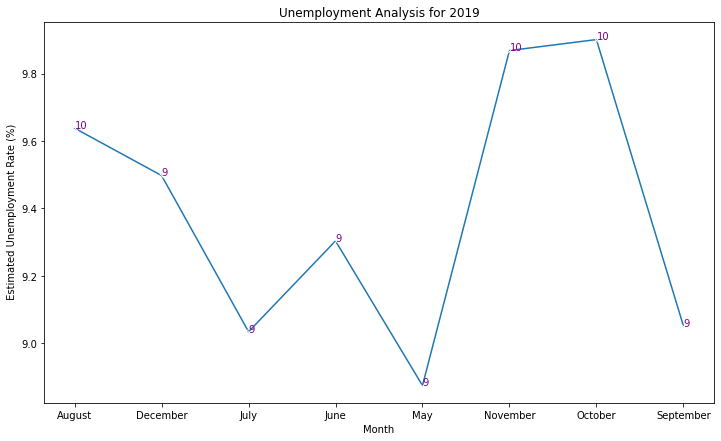

In [25]:
plt.figure(figsize=(12,7))
plot=sns.lineplot(x='Month',y=' Estimated Unemployment Rate (%)',data=df[df['Year']=='2019'].groupby('Month',as_index=False)[' Estimated Unemployment Rate (%)'].mean(),marker='x',sort=True)
plt.title('Unemployment Analysis for 2019')
  # label points on the plot
for x, y in zip(df[df['Year']=='2019'].groupby(['Month'],as_index=False)[' Estimated Unemployment Rate (%)'].mean()['Month'], df[df['Year']=='2019'].groupby(['Month'],as_index=False)[' Estimated Unemployment Rate (%)'].mean()[' Estimated Unemployment Rate (%)']):
 # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
  plt.text(x = x, # x-coordinate position of data label
  y = y, # y-coordinate position of data label
  s = '{:.0f}'.format(y), # data label, formatted to ignore decimals
  color = 'purple') # set colour of line



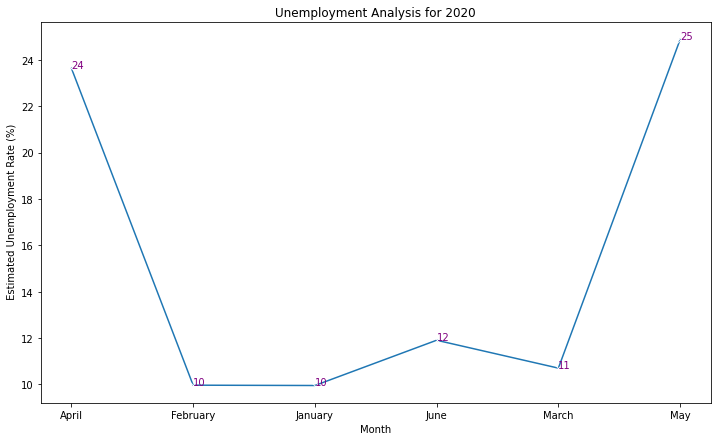

In [26]:
plt.figure(figsize=(12,7))
plot=sns.lineplot(x='Month',y=' Estimated Unemployment Rate (%)',data=df[df['Year']=='2020'].groupby('Month',as_index=False)[' Estimated Unemployment Rate (%)'].mean(),marker='x',sort=True)
plt.title('Unemployment Analysis for 2020')
  # label points on the plot
for x, y in zip(df[df['Year']=='2020'].groupby(['Month'],as_index=False)[' Estimated Unemployment Rate (%)'].mean()['Month'], df[df['Year']=='2020'].groupby(['Month'],as_index=False)[' Estimated Unemployment Rate (%)'].mean()[' Estimated Unemployment Rate (%)']):
 # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
  plt.text(x = x, # x-coordinate position of data label
  y = y, # y-coordinate position of data label
  s = '{:.0f}'.format(y), # data label, formatted to ignore decimals
  color = 'purple') # set colour of line


## **Inferences**

*   Urban areas had higher Unemployment Rate as compared to Rural areas
*   Tripura had the highest Unemployment rate and Meghalaya had the lowest unemployment rate.
*   2020 had a higher Unemployment Rate as compared to 2019
*   For 2019 October had the highest and July had the lowest Unemployment Rate
*    For 2020 May had the highest and January and February had the lowest Unemployment Rate








### Thank You !